# DQLab Sales Performance Analysis
### By Alifandi

# Objective
- Understand business performance by tracking historical sales data to gain valuable insights.
- Get business insight about Which product categories and product sub-categories are most ordered.
- Get business insight about which product categories and product sub-categories are most income.
- Get business insight about how is the quarterly performace of dqlab sales.
- Get business insight about how is the monthly performance of dqlab sales.
- Get business insight about how is the daily performance of dqlab sales.
- Get business insight about which product sub-categories are frequently returned and cancelled by customers.

# Business Understanding
- Retail is selling something (either consumer goods or consumer services) to customers and, as a result, earning a profit.
- This project has some business question using the data:
  - Which product categories and product sub-categories are most ordered?  
  - Which product categories and product sub-categories are most income?
  - How is the quarterly performace of dqlab sales?
  - How is the monthly performance of dqlab sales?
  - How is the daily performance of dqlab sales?
  - Which product sub-categories are frequently returned and cancelled by customers?


# Data Understanding
- A historical retail sales data from 2009 to 2012.
- Data contain 3 product category which are office supplies, technology, and furniture. Each category has several sub-categories.
- The raw dataset has 5499 rows and 1 columns.
- Attribute Information:
- *order_id*: unique order number.
- *order_status*: status of the order, whether is finished or returned.
- *customer*: customer name.
- *order_date*: date of the order.
- *order_quantity*: the quantity on a particular order.
- *sales*: sales generated on a particular order, the value is in IDR(Indonesia Rupiah) currency.
- *discount*: a discount percentage.
- *discount_value*: a sales multiply by discount, the value is in IDR(Indonesia Rupiah) currency.
- *product_category*: a category of the product.
- *product_sub_category*: a subcategory from product category.
- Data source: Sales Performance Report DQLab Store https://www.kaggle.com/datasets/dhawyfarrasputra/sales-performance-report-dqlab-store

# Importing libraries and dataset

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [40]:
df_raw = pd.read_csv('sales_raw.csv')
df_raw.head()

,order_id | order_status | customer | order_date | order_quantity | sales | discount | discount_value | product_category | product_sub_category |
0,+----------+-----------------+----------------...
1,| 3 | Order Finished | Muhammed MacInt...
2,| 293 | Order Finished | Barry French ...
3,| 483 | Order Finished | Clay Rozendal ...
4,| 515 | Order Finished | Carlos Soltero ...


In [41]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 1 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                            --------------  ----- 
 0    order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |  5501 non-null   object
dtypes: object(1)
memory usage: 43.1+ KB


Dataset terlihat cukup berantakan dan tidak terstruktur, sehingga kita perlu membersihkannya untuk mempermudah proses analisis.

# Data cleaning

In [42]:
# Split column
df_split = df_raw[' order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |'].str.split('|', expand=True)
df_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,+----------+-----------------+----------------...,None,None,None,None,None,None,None,None,None,None,None
1,,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,
2,,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,
3,,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication,
4,,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,


Dataset sudah berhasil kita split menjadi beberapa kolom, namun masih ada error pada nama kolom. Mari kita ubah nama kolom yang sesuai agar mudah dibaca.

In [43]:
# Remove error column name
df_clean = df_split.drop(columns=[0, 11])

In [44]:
# Remove error value in row
df_clean = df_clean.drop([0,5500])

In [45]:
# Rename column
df_clean = df_clean.rename({1: 'order_id', 2: 'order_status', 3: 'customer', 4: 'order_date', 5: 'order_quantity', 6: 'sales', 7: 'discount', 8: 'discount_value', 9: 'product_category', 10: 'product_sub_category'}, axis=1)
df_clean.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
1,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
2,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
3,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
4,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
5,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


Kolom dan baris sudah kita bersihkan dari nilai yang error. Mari kita cek tipe data dan jumlah baris dari dataset menggunakan `df.info()`.

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 1 to 5499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              5499 non-null   object
 1   order_status          5499 non-null   object
 2   customer              5499 non-null   object
 3   order_date            5499 non-null   object
 4   order_quantity        5499 non-null   object
 5   sales                 5499 non-null   object
 6   discount              5499 non-null   object
 7   discount_value        5499 non-null   object
 8   product_category      5499 non-null   object
 9   product_sub_category  5499 non-null   object
dtypes: object(10)
memory usage: 429.7+ KB


Terlihat bahwa, tipe data pada seluruh kolom di dataset masih object atau string. Mari kita ubah tipe data pada dataset yang sesuai dengan nama kolomnya.

In [47]:
# Change datatype
# to numeric
df_clean[['order_id', 'order_quantity', 'sales', 'discount', 'discount_value']] = df_clean[['order_id', 'order_quantity', 'sales', 'discount', 'discount_value']] \
  .apply(pd.to_numeric)
# to datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
df_clean.dtypes

order_id                         int64
order_status                    object
customer                        object
order_date              datetime64[ns]
order_quantity                   int64
sales                            int64
discount                       float64
discount_value                   int64
product_category                object
product_sub_category            object
dtype: object

In [48]:
# Check missing value
df_clean.isnull().sum()

order_id                0
order_status            0
customer                0
order_date              0
order_quantity          0
sales                   0
discount                0
discount_value          0
product_category        0
product_sub_category    0
dtype: int64

In [49]:
# Check duplicate
df_clean.duplicated().sum()

0

Beruntung!! dataset tidak mengandung missing dan duplicate values.

In [50]:
# Sanity check
df = df_clean
df.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
1,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
2,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
3,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
4,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
5,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


# Data Preparation

Kali ini, kita akan membuat kolom baru berdasarkan kolom yang sudah ada di dataset agar dapat menjawab pertanyaan bisnis yang sudah kita nyatakan sebelumnya. Kolom baru yang kita buat yaitu `revenue`, `quarter`, `year`, `month`, dan `week_day`.

### Add a revenue column

In [51]:
# Add a revenue column: sales - discount_value
df['revenue'] = df['sales'] - df['discount_value']

### Breakdown 'order_date' column

In [52]:
# Breakdown 'order_date' column: quarter, year, month, week_day
df['quarter'] = df['order_date'].dt.to_period('Q')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].apply(lambda x: x.strftime('%B-%Y'))
df['week_day'] = df['order_date'].dt.weekday

# Replace numeric value in week_day column into names of the days
df['week_day'] = df['week_day'].replace([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Check outliers

Terakhir, mari kita cek dataset apakah terdapat nilai outlier atau tidak. Keberadaan outlier pada dataset dapat memiliki dampak yang signifikan pada proses analisis data.

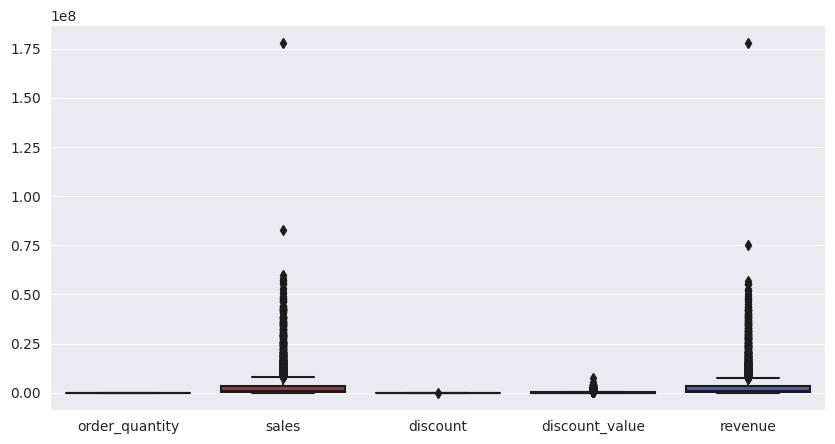

In [53]:
# Check outliers: boxplot
plt.figure(figsize = (10, 5))
sns.boxplot(data=df[['order_quantity','sales','discount','discount_value','revenue']])
plt.show()

Bisa kita lihat, pada kolom `sales` dan `revenue` memiliki nilai yang terlampau jauh dari data point lainnya. Maka dari itu, kolom `sales` dan `revenue` memiliki nilai outlier. Selanjutnya kita perlu menghapus nilai outlier dari dataset menggunakan metode IQR.

### Remove outliers

In [54]:
# Define a function called 'outliers' which returns a list of index of outliers

def outliers(df, ft):
  q1 = df[ft].quantile(0.25)
  q3 = df[ft].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return ls

In [55]:
# Create an empty list to store output indices from multiple columns

index_list = []
for feature in ['sales','revenue']:
  index_list.extend(outliers(df, feature))

In [ ]:
# Show list of index of outliers
index_list

In [57]:
# Define a function called 'remove' which returns a cleaned dataframe without outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [58]:
# Call 'remove' function
df = remove(df, index_list)

<Axes: >

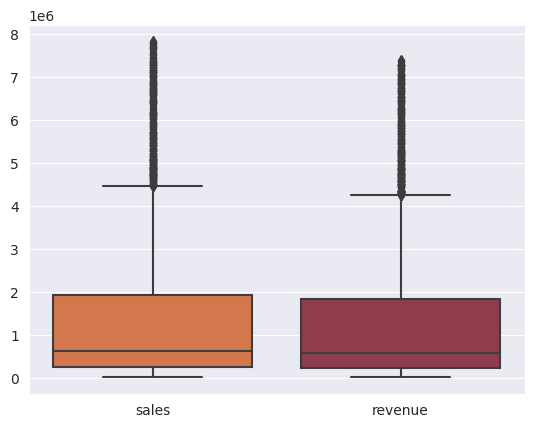

In [59]:
# Sanity check again
sns.boxplot(data=df[['sales','revenue']])

Terlihat pada boxplot diatas, kolom `sales` dan `revenue` sudah tidak memiliki nilai outlier lagi.

In [60]:
df_clean.shape # Before remove outliers

(5499, 15)

In [61]:
df.shape # After remove outliers

(4797, 15)

Untuk explorasi data, kita akan menggunakan dataset `df` dengan 4797 baris dan 15 kolom

# Exploration

### Initial Exploration

<ipython-input-62-60b66dc36aaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

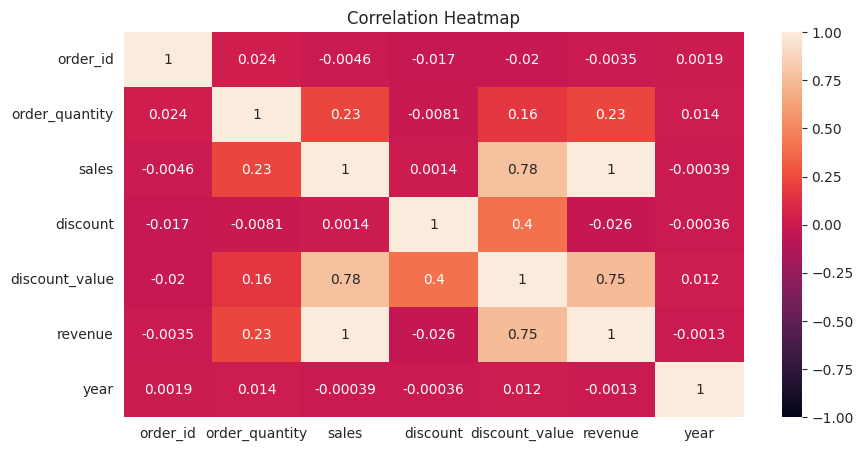

In [62]:
plt.figure(figsize=(10, 5))
g = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12})

Berdasarkan dari hasil ini, ada beberapa kolom yang memiliki korelasi positif:
- `discount_value` and `sales` (0.78): Indicates a strong positive correlation. When discount_value increases, sales also tends to increase.
- `discount_value` and `revenue` (0.75): Indicates a strong positive correlation. When discount_value increases, revenue also tends to increase.

### Question 1. Which product categories and product sub-categories are most ordered?

Text(0.5, 0, 'Total Number of Order')

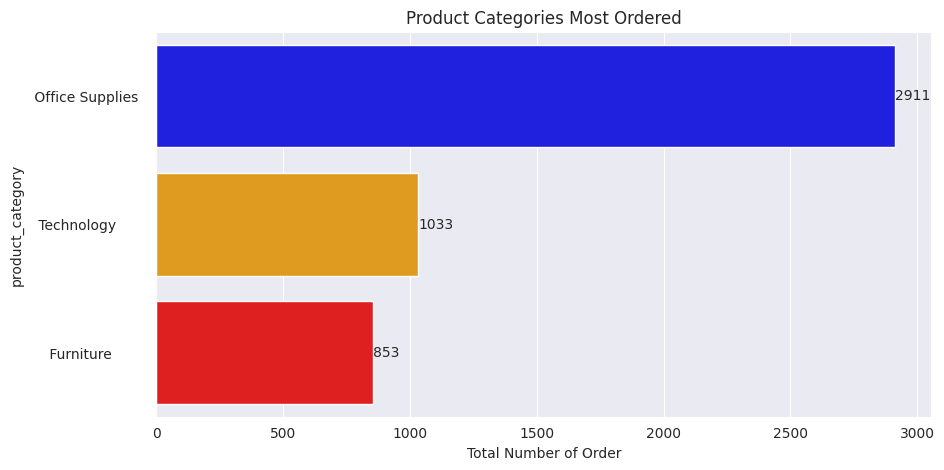

In [63]:
# Product category
most_cat = df.groupby('product_category')['order_id'].count().reset_index().sort_values('order_id', ascending=False).set_index('product_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_cat['order_id'], y=most_cat.index, palette=sns.blend_palette(['blue', 'orange', 'red'], 3))
ax.bar_label(ax.containers[0])
ax.set_title('Product Categories Most Ordered')
ax.set_xlabel('Total Number of Order')

'Office Supplies' merupakan kategori produk dengan order tertinggi sebanyak 2911 kali atau sekitar 60% dari total seluruh kategori produk yang dipesan.

Text(0.5, 0, 'Total Number of Order')

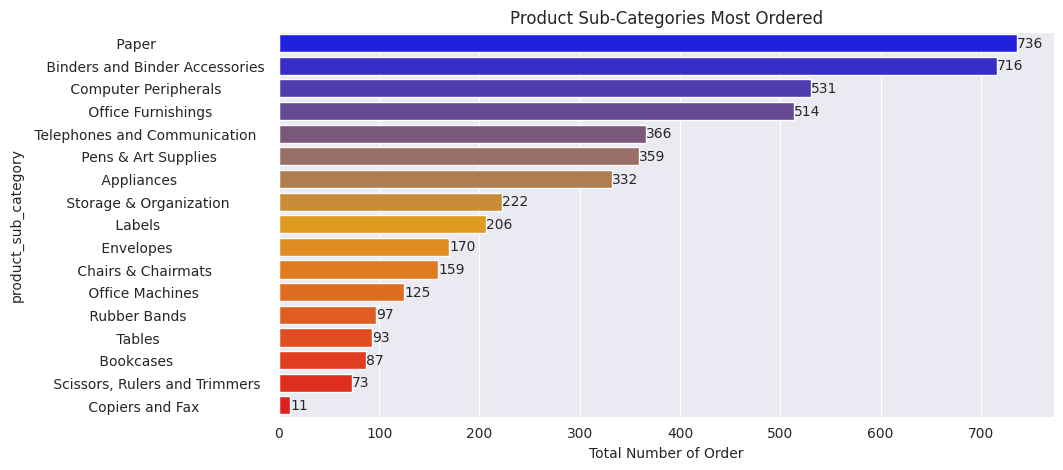

In [64]:
# Product sub-category
most_sub_cat = df.groupby('product_sub_category')['order_id'].count().reset_index().sort_values('order_id', ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_sub_cat['order_id'], y=most_sub_cat.index, palette=sns.blend_palette(['blue', 'orange', 'red'], 17))
ax.bar_label(ax.containers[0])
ax.set_title('Product Sub-Categories Most Ordered')
ax.set_xlabel('Total Number of Order')

'Paper' merupakan sub kategori produk dengan order tertinggi sebanyak 736 kali atau sekitar 15% dari total seluruh sub kategori produk yang dipesan.

### Question 2. Which product categories and product sub-categories are most income?

Text(0, 0.5, 'Total Revenue')

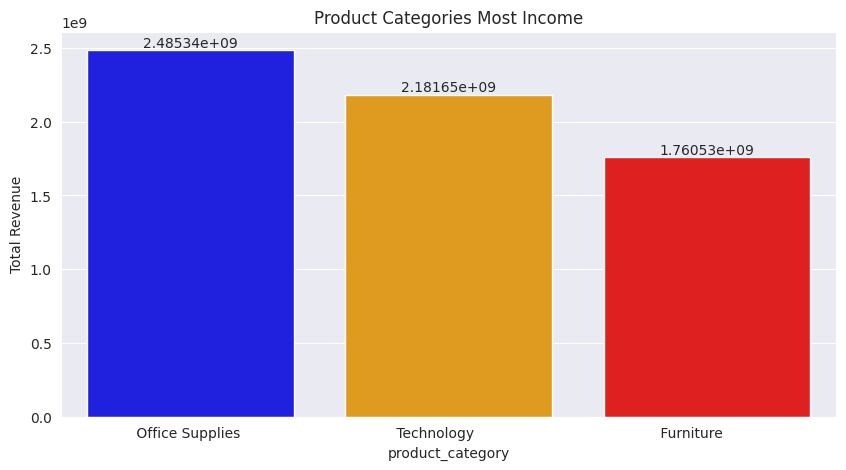

In [65]:
# Product category
cat_profit = df.groupby('product_category')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).set_index('product_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=cat_profit.index, y=cat_profit['revenue'], palette=sns.blend_palette(['blue', 'orange', 'red'], 3))
ax.bar_label(ax.containers[0])
ax.set_title('Product Categories Most Income')
ax.set_ylabel('Total Revenue')

'Office Supplies' merupakan kategori produk dengan pendapatan tertinggi sebesar 2,4 milliar lebih atau sekitar 38% dari total seluruh pendapatan kategori produk. Selain terjual banyak, kategori produk 'Office Supplies' juga menghasilkan pendapatan yang tinggi.

Text(0, 0.5, 'Total Revenue')

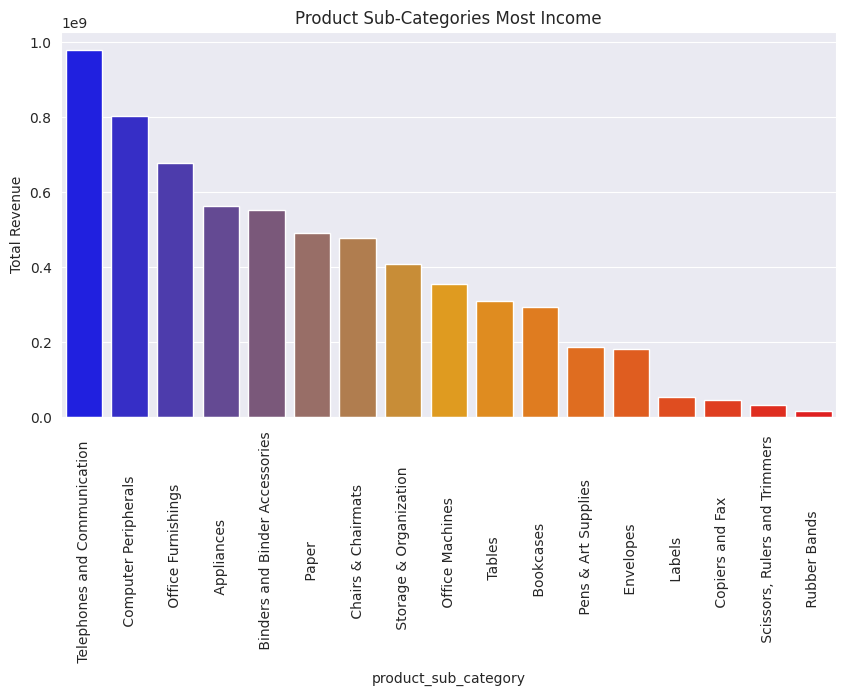

In [66]:
# Product sub-category
sub_cat_profit = df.groupby('product_sub_category')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
ax = sns.barplot(x=sub_cat_profit.index, y=sub_cat_profit['revenue'], palette=sns.blend_palette(['blue', 'orange', 'red'], 17))
ax.set_title('Product Sub-Categories Most Income')
ax.set_ylabel('Total Revenue')

'Telephones and Communication' merupakan sub kategori produk dengan pendapatan tertinggi sebesar 978 juta. Namun, sub kategori produk 'Telephones and Communication' bukan pesanan yang tertinggi. Hal ini bisa terjadi karena harga dari sub kategori produk 'Telephones and Communication' cukup besar jika dibandingkan dengan jenis 'Paper'.

### Question 3. How is the quarterly performace of dqlab sales?

In [120]:
# Create palette dictionary for highlight bar chart
df['quarter'] = df['quarter'].astype('str')
palette_dict = {
     '2009Q1': 'gray', '2009Q2': 'gray', '2009Q3': 'gray', '2009Q4': 'gray',
     '2010Q1': 'red', '2010Q2': 'gray', '2010Q3': 'gray', '2010Q4': 'gray',
     '2011Q1': 'gray', '2011Q2': 'gray', '2011Q3': 'gray', '2011Q4': 'gray',
     '2012Q1': 'gray', '2012Q2': 'blue', '2012Q3': 'gray', '2012Q4': 'gray'
}

Text(0.5, 0, 'Quarter')

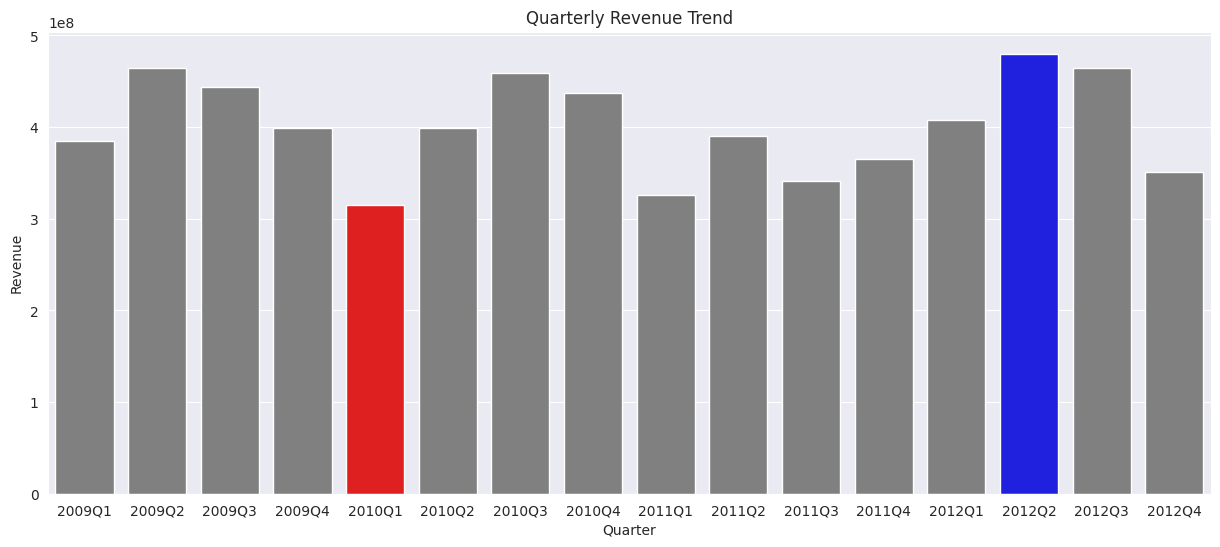

In [121]:
qtr_rev = df.groupby('quarter')['revenue'].sum().reset_index()
plt.figure(figsize=(15,6))
ax = sns.barplot(data=qtr_rev, x='quarter', y='revenue', palette=palette_dict)
ax.set_title('Quarterly Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Quarter')

Pendapatan cenderung memuncak pada kuartal ke-2 (april-juni) atau ke-3 (juli-september). Pendapatan tertinggi terjadi pada kuartal ke-2 tahun 2012 dengan 480 juta atau sekitar 28% dari total pendapatan selama tahun 2012. Pendapatan terendah terjadi pada kuartal ke-1 tahun 2010.

### Question 4. How is the monthly performance of dqlab sales?

In [68]:
# Sorting the names of months and years
mnth_rev = df.groupby('month')['revenue'].sum().reset_index()
mapping = {
    'January-2009':0,'February-2009':1,'March-2009':2,'April-2009':3,'May-2009':4,'June-2009':5,
    'July-2009':6,'August-2009':7,'September-2009':8,'October-2009':9,'November-2009':10,'December-2009':11,
    'January-2010':12,'February-2010':13,'March-2010':14,'April-2010':15,'May-2010':16,'June-2010':17,
    'July-2010':18,'August-2010':19,'September-2010':20,'October-2010':21,'November-2010':22,'December-2010':23,
    'January-2011':24,'February-2011':25,'March-2011':26,'April-2011':27,'May-2011':28,'June-2011':29,
    'July-2011':30,'August-2011':31,'September-2011':32,'October-2011':33,'November-2011':34,'December-2011':35,
    'January-2012':36,'February-2012':37,'March-2012':38,'April-2012':39,'May-2012':40,'June-2012':41,
    'July-2012':42,'August-2012':43,'September-2012':44,'October-2012':45,'November-2012':46,'December-2012':47
}
mnth_rev['sorting'] = mnth_rev['month'].apply(lambda month_name: mapping[month_name])
mnth_rev = mnth_rev.sort_values(by='sorting',axis=0)

Text(0.5, 0, 'Month')

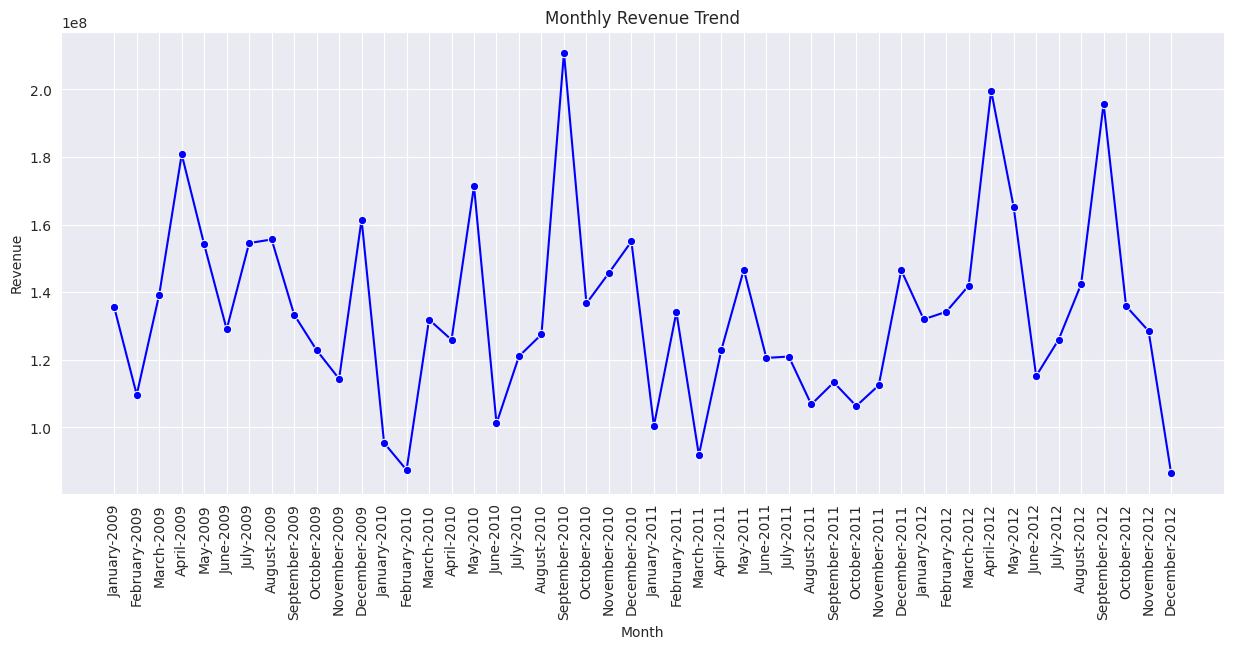

In [81]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mnth_rev, x='month', y='revenue', marker='o', dashes=False, errorbar=None, color='blue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Monthly Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Month')

Penjualan di bulan September 2010 menghasilkan pendapatan tertinggi mencapai 210 juta atau naik sekitar 65% dari bulan sebelumnya (Agustus 2010). Pendapatan juga memuncak setelahnya di bulan April dan September 2012 masing-masing menghasilkan 199 juta dan 195 juta.

### Question 5. How is the daily performance of dqlab sales?

In [70]:
# Sorting the names of days
day_rev = df.groupby('week_day')['revenue'].sum().reset_index()
mapping = {
    'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6
}
day_rev['sorting'] = day_rev['week_day'].apply(lambda day_name: mapping[day_name])
days_rev = day_rev.sort_values(by='sorting',axis=0)

In [71]:
# Create palette dictionary for highlight bar chart
palette_dict = {
    'Monday': 'blue', 'Tuesday': 'gray', 'Wednesday': 'gray', 'Thursday': 'gray',
    'Friday': 'gray', 'Saturday': 'blue', 'Sunday': 'gray'
}

Text(0.5, 0, 'Day')

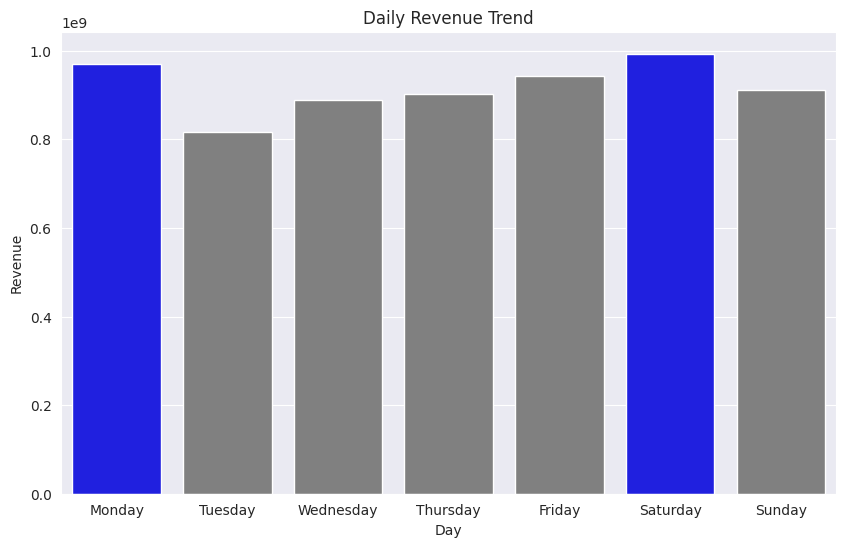

In [72]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=days_rev, x='week_day', y='revenue', palette=palette_dict)
ax.set_title('Daily Revenue Trend')
ax.set_ylabel('Revenue')
ax.set_xlabel('Day')

Penjualan di hari sabtu menghasilkan pendapatan tertinggi mencapai 993 juta. Selain itu, pendapatan juga tinggi di hari senin mencapai 969 juta. Jadi pendapatan memuncak pada awal weekday hari senin (15.08%) dan awal weekend hari sabtu (15.45%).




### Question 6. Which product sub-categories are frequently returned and cancelled by customers?

In [92]:
# Filter order_status = returned and canceled
df_canc_ret = df[df['order_status'].str.contains("Returned","Cancelled")]

Text(0, 0.5, 'Product Sub-Category')

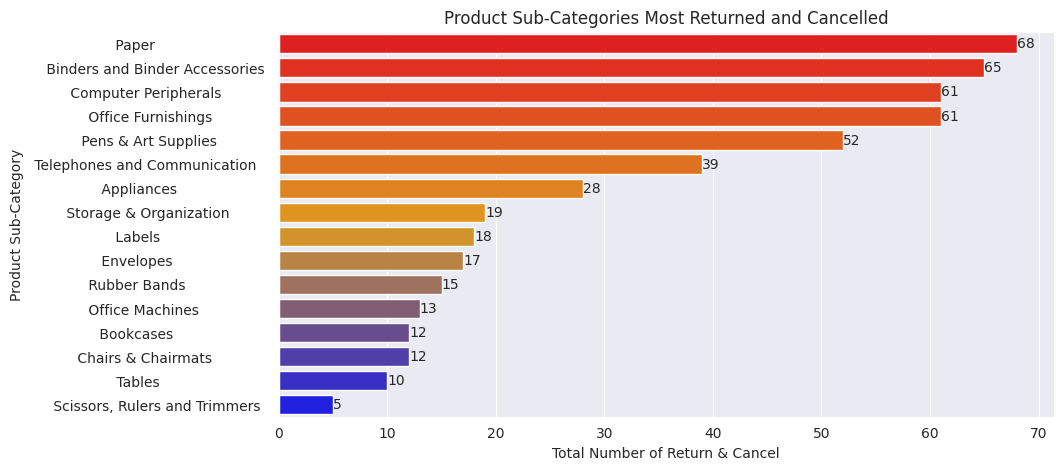

In [84]:
most_return = df_canc_ret.groupby('product_sub_category')['order_id'].count().reset_index().sort_values(
    'order_id', ascending=False).set_index('product_sub_category')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=most_return['order_id'], y=most_return.index, palette=sns.blend_palette(['red', 'orange', 'blue'], 16))
ax.bar_label(ax.containers[0])
ax.set_title('Product Sub-Categories Most Returned and Cancelled')
ax.set_xlabel('Total Number of Return & Cancel')
ax.set_ylabel('Product Sub-Category')

'Paper' merupakan sub kategori produk dengan jumlah pesanan cancel dan return terbanyak sebanyak 68 kali atau sekitar 13.73% dari total seluruh pesanan yang gagal. Pesanan yang dicancel atau dikembalikan bisa disebabkan oleh beberapa faktor seperti, lamanya pengiriman, kualitas pengiriman, dan kualitas barang. Sayangnya, kita tidak memiliki kolom 'ship_date', 'ship_arrived', 'ship_mode', dan 'customer_rating' untuk memastikan kualitas produk dan pengiriman untuk mencari penyebab kenapa pesanan dikembalikan atau dibatalkan.

# Conclusion
Analisis Performa:

Tren Penjualan: Periksa tren penjualan per quarter dan per bulan untuk mengidentifikasi pola atau fluktuasi dalam penjualan.
Kategori Produk: Identifikasi kategori produk yang memiliki kontribusi penjualan tertinggi.

# Recommendation
Rekomendasi:

Peningkatan Stok: Tingkatkan stok produk yang paling diminati untuk mengatasi permintaan tinggi.
Promosi: Lakukan promosi atau diskon pada kategori produk yang memiliki penjualan rendah untuk mendorong pembelian.
Analisis Discount: Evaluasi efektivitas diskon dengan memeriksa apakah diskon meningkatkan penjualan dan apakah ada pola tertentu terkait dengan diskon.
Kampanye Pemasaran: Pertimbangkan kampanye pemasaran khusus untuk meningkatkan kesadaran pelanggan terhadap produk tertentu atau kategori produk.
Analisis Musim: Jika ada tren musiman, sesuaikan strategi pemasaran atau persediaan produk untuk mengoptimalkan penjualan selama periode tersebut.